# Fundamentals of Data Analysis Assignment

## Semester 2, October 2018, Eimear Butler

This assigmnent focuses on the four data sets known as the Anscombe Quartet. I have been assigned questions in relation to the data set and have been asked to detail my response in this Jupyter Notebook. The four questions posed are as follows; 

### 1. Explain the background to the dataset – who created it, when it was created, and any speculation you can find regarding how it might have been created.

The Anscombe Quartet Data was published in 1973<sup>1</sup> bu Francis Anscombe, an English statistician. Anscombe opens his article with a line that both sets the scene and summarises the objective of his research and article;
> “  Graphs are essential to good statistical analysis.”

He goes further during his introduction to challenge the thinking of the time that numbers are precise while graphs were percieved as “rough” and states that;

>”A computer should make *both* calculations *and* graphs. Both sorts of output should be studied; each will contribute to understanding.”

>“Graphs can have various purposes such as: 
i) to help us perceive and appreciate some broad features of the data
ii) to let us look behind those broad features and see what else is there.”

The use of computers for creating graphs not as common as it is today and anscombe aimed to use the four data sets he created as evidence that this is an essential part of investigating all data.  

>“Most kinds of statistical calculation rest on assumptions about the behavior of the data. Those assumptions may be false, and then the calculations may be misleading. We ought always to try to check whether the assumptions are reasonably correct; and if they are wrong we ought to be able to perceive in what ways they are wrong. Graphs are very valuable for these purposes.”

Anscombe proceeds to outline the four dats sets which ultimately prove his point<sup>1</sup>.  

<img src='https://github.com/eimearbutler7/FundamentalsDA/blob/master/z_Anscombe%20Data.png?raw=true' width="400" height="300"> 

Notice how Anscombe even presents the data set highlighting how the *x* values are exactly the same for the first 3 data sets and the fourth contains ten values of 8 with only one value of 19. The *y* values then vary, and no obvious pattern is seen between them. 

Anscombe goes on to explain the significance of the four data sets, that when analyzing the values only, they have very similar characteristics. However, when the values are then plotted in simple scatter plot, they are seen to be very different.  

<img src='https://github.com/eimearbutler7/FundamentalsDA/blob/master/z_Table.png?raw=true' width="400" height="300"> 

In this assignment, I intend to test Anscombe’s data to see if I can reproduce his results within this Jupyter Notebook. 

Regarding the way in which Anscombe created these data sets, this remaines a mystery, however, today there are other examples available to us demonstrating how different data sets produce very similar descriptive statistics but completely different graphs. The Datasaurus Dozen<sup>2</sup> is a fantastic demonstration of just how different data sets can be while maintaining the same key statistically descriptive values. The authors produced a video and gif file<sup>2</sup> as part of their publication to bring it to life, shown here: 


<img src='https://d2f99xq7vri1nk.cloudfront.net/DinoSequentialSmaller.gif' width="400" height="300"> 

As you will have spotted, this dataset even uses Alberto Cairo's Datasaurus<sup>3</sup> as well as other somewhat symmetrical shapes while keeping the descritive statistics the same to 2 decimal points. Cairo's Datasaurus is now used widely and is available as a csv file through his blog post<sup>3</sup> to recreate as I have done below.  

In [ ]:
import pandas as pd #import pandas functionality
import numpy as np #import numpy functionality
import matplotlib.pyplot as plt #import matplotlib functionalities

d = pd.read_csv('https://raw.githubusercontent.com/eimearbutler7/FundamentalsDA/master/z_Datasaurus_data.csv')
plt.plot(d.loc[:,'x'],d.loc[:,'y'],'o',color='black') # create graph using all x and y data values. Represent them with black circles
plt.show() # show the plot

Justin Matejka and George Fitzmaurice started with the descriptive statistics* of the Datasaurus and then created a technique where they could feed in a target shape to their program and test the repeated movement of data points towards the new shape to see if they still met the overall descriptive statistice to within two decimal points<sup>4</sup>. This required running the process a number of times and within his blog post, Matejka quotes the movement towards the circle shape needing 200,000 small movements<sup>4</sup>. 

<sub>\* *means, standard deviations, and correlations*</sub>

They then used a system of simulated annealing to optomise the process and reduce the number of points needing to be tested. 

Simulated aneeling works to optomise the combinatorial methods and is described as: 
>"...unlikely to find the optimum solution, [however,] it can often find a very good solution, even in the presence of noisy data.<sup>5</sup>."

An example of this technique in action is the *Travelling Salesman* problem where the salesman knows he needs to visit numerous locations scattered across an area but needs to find the shortest route to visit them all<sup>5</sup>. This challenge is well demonstrated in the following gif<sup>6</sup> where the different combinations for all 125 points are processes to find the optimal route. 

<img src='https://upload.wikimedia.org/wikipedia/commons/1/10/Travelling_salesman_problem_solved_with_simulated_annealing.gif' width="250" height="200"> 

## 2. Plot the interesting aspects of the dataset.

In [ ]:
#Load the .csv dataset from my git hub repository using pandas
df = pd.read_csv('https://raw.githubusercontent.com/eimearbutler7/FundamentalsDA/master/z_Anscombes.csv')  
df #view the data

In [ ]:
import seaborn as sns #import seaborn functionalities
sns.pairplot(df, hue='dataset')   #seaborn's pairplot function allows us a quick overview of the data separating each data set by colour

Instantly using the seaborn `.pairplot` function the significant differences between the data sets can be seen. Lets go further and pull out each data set and analyse individually to see their shape:

In [ ]:
#create subsets of each data set 'x' yalues
x = df.loc[:,'x']
x1 = df.loc[:10,'x'] 
x2 = df.loc[11:21,'x']
x3 = df.loc[22:32,'x']
x4 = df.loc[33:43,'x']
#can call x1, x2, x3 or x4 here to test the data is correct before proceeding

In [ ]:
#create subsets of each data set 'y' yalues
y = df.loc[:,'y']
y1 = df.loc[:10,'y'] 
y2 = df.loc[11:21,'y']
y3 = df.loc[22:32,'y']
y4 = df.loc[33:43,'y']
#can call y1, y2, y3 or y4 here to test the data is correct before proceeding

Using the numpy `.ployfit` function, I can also determine the *m* and *c* values for each plot where *m* is the slope of the line and *c* the value of *y* where the line crosses the *x* axis (i.e. *x* is 0). This will allow me to add a "best fit" line to the graph. 

In [ ]:
(m1,c1) = np.polyfit(x1,y1,1) #use ployfit function to determine least squares polynomial line fit, where 1 is the Degree of the fitting the polynomial
(m2,c2) = np.polyfit(x2,y2,1) #repeat for x2,y2 
(m3,c3) = np.polyfit(x3,y3,1) #repeat for x3,y3 
(m4,c4) = np.polyfit(x4,y4,1) #repeat for x4,y4 

#where the resuting m and c are values in the equation of a straight line (y=mx+c)

out = [(m1,c1),(m2,c2),(m3,c3),(m4,c4)] 
out

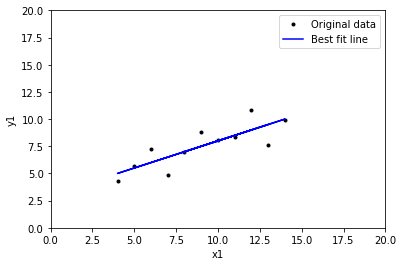

In [441]:
# I can now plot the data with the best fit line using the method provided by Ian McLoughlan (https://raw.githubusercontent.com/ianmcloughlin/jupyter-teaching-notebooks/master/simple-linear-regression.ipynb)
plt.plot(x1, y1, 'k.', label='Original data')
plt.plot(x1, m1 * x1 + c1, 'b-', label='Best fit line') #using m and c values determined above

plt.xlim([0,20]) #set graph limits for x axis
plt.ylim([0,20]) #set graph limits for y axis
plt.xlabel('x1') #set name for x axis
plt.ylabel('y1') #set name for y axis

plt.legend() # add a legend
plt.show() #show the plot inline

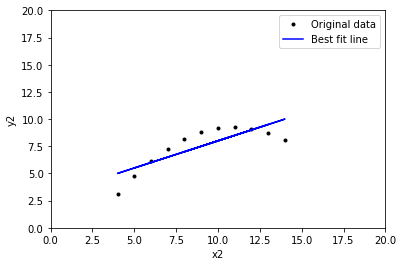

In [442]:
# I can repoeat for x2,y2
plt.plot(x2, y2, 'k.', label='Original data')
plt.plot(x2, m2 * x2 + c2, 'b-', label='Best fit line')

plt.xlim([0,20]) #set graph limits for x axis
plt.ylim([0,20]) #set graph limits for y axis
plt.xlabel('x2') #set name for x axis
plt.ylabel('y2') #set name for y axis

plt.legend() # add a legend
plt.show() #show the plot inline

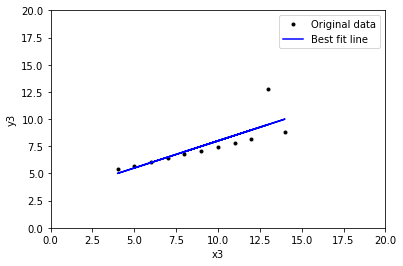

In [444]:
# I can repoeat for x3,y3
plt.plot(x3, y3, 'k.', label='Original data')
plt.plot(x3, m3 * x3 + c3, 'b-', label='Best fit line')

plt.xlim([0,20]) #set graph limits for x axis
plt.ylim([0,20]) #set graph limits for y axis
plt.xlabel('x3') #set name for x axis
plt.ylabel('y3') #set name for y axis

plt.legend() # add a legend
plt.show() #show the plot inline

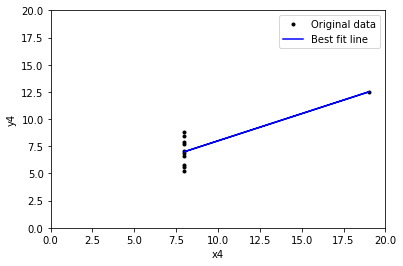

In [443]:
# I can repeat for x4,y4
plt.plot(x4, y4, 'k.', label='Original data')
plt.plot(x4, m4 * x4 + c4, 'b-', label='Best fit line')

plt.xlim([0,20]) #set graph limits for x axis
plt.ylim([0,20]) #set graph limits for y axis
plt.xlabel('x4') #set name for x axis
plt.ylabel('y4') #set name for y axis

plt.legend() # add a legend
plt.show() #show the plot inline 

Clearly all 4 graphs are very different even though they accept an almost identical "best fit" line. 

## 3. Calculate the descriptive statistics of the variables in the dataset

Instantly using the `.describe` function we confirm some of Anscombe's descriptive statistics table. 

In [ ]:
df.describe() #also is useful to give an instant overview of the high level descriptive statistics 

Lets go further and pull out each data set and analyse individually to see if I can confirm his descriptive statistics findings. Please note, where possible, results for all 4 datasets are presented in one list to allow easy comparison instead of being run in individual cells. 

- Number of observations (*n*) = 4 sets of 11 values
- Mean of the x’s ($\bar{x}$) = 9.0 (also confirmed below for all 4 sets separately)


In [502]:
x_mean = [np.mean(x1),np.mean(x2), np.mean(x3), np.mean(x4)] #show list of mean x values for each data set
print('Mean of X values is:', x_mean)

Mean of X values is: [9.0, 9.0, 9.0, 9.0]


In [503]:
y_mean = [np.mean(y1),np.mean(y2), np.mean(y3), np.mean(y4)] #show list of mean y vaues for each data set
print('Mean of Y values is:', y_mean)

Mean of Y values is: [7.500909090909093, 7.500909090909091, 7.500000000000001, 7.50090909090909]


The sample variance of the data is also consistent although Anscombe does not include this in his published table. 

In [500]:
x_variance = [np.var(x1,ddof=1), np.var(x2,ddof=1), np.var(x3,ddof=1), np.var(x4,ddof=1)] #show list of x variance vaues for each data set where ddof=1 was added using advice from https://stackoverflow.com/questions/41204400/what-is-the-difference-between-numpy-var-and-statistics-variance-in-python
print('Variance for X values are:', x_variance)

Variance for X values are: [11.0, 11.0, 11.0, 11.0]


In [499]:
y_variance = [np.var(y1,ddof=1), np.var(y2,ddof=1), np.var(y3,ddof=1), np.var(y4,ddof=1)] #show list of x variance vaues for each data set where ddof=1 was added using advice from https://stackoverflow.com/questions/41204400/what-is-the-difference-between-numpy-var-and-statistics-variance-in-python
print('Variance for Y values are:', y_variance)

Variance for Y values are: [4.127269090909091, 4.127629090909091, 4.12262, 4.12324909090909]


Anscombe has instead represented variance using the R<sup>2</sup> coefficient which I can also determine for each data set using the `stats.linregress` function:

In [498]:
from scipy import stats #import stats function within scipy

slope_1, intercept_1, r_value_1, p_value_1, std_err_1 = stats.linregress(x1, y1) #use example from scipy manual to find r value (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)
slope_2, intercept_2, r_value_2, p_value_2, std_err_2 = stats.linregress(x2, y2) #repeat for other data sets
slope_3, intercept_3, r_value_3, p_value_3, std_err_3 = stats.linregress(x3, y3) #repeat for other data sets
slope_4, intercept_4, r_value_4, p_value_4, std_err_4 = stats.linregress(x4, y4) #repeat for other data sets
print("R Squared Value for all 4 sets", r_value_1**2, r_value_2**2, r_value_3**2, r_value_4**2)

R Squared Value for all 4 sets 0.666542459508775 0.6662420337274844 0.6663240410665591 0.6667072568984652


Again we see consistant results with R<sup>2</sup> results to 3 decimal places and with the Standard Deviation:

In [504]:
x_SD = [np.std(x1), np.std(x2), np.std(x3), np.std(x4)] #show list of standard distribution for x values in each data set
print('Standard Deviation of X Values are:', x_SD)

Standard Deviation of X Values are: [3.1622776601683795, 3.1622776601683795, 3.1622776601683795, 3.1622776601683795]


In [505]:
y_SD = [np.std(y1), np.std(y2), np.std(y3), np.std(y4)] #show list of standard distribution for y values in each data set
print('Standard Deviation of Y Values are:', y_SD)

Standard Deviation of Y Values are: [1.937024215108669, 1.93710869148962, 1.9359329439927313, 1.9360806451340837]


I can also now calculate the Sum of Squares value using the calculation Anscombe gave us himself in his overview table (x - $\bar{x}$):

In [506]:
#Anscombe himself gives us the 
x_sum_of_squares = [np.sum((x1**2)-(np.mean(x1)**2)), np.sum((x2**2)-(np.mean(x2)**2)), np.sum((x3**2)-(np.mean(x3)**2)), np.sum((x4**2)-(np.mean(x4)**2))]
print('X value Sum of Squares:', x_sum_of_squares) #results printed in a list to allow easy comparison

X value Sum of Squares: [110.0, 110.0, 110.0, 110.0]


### Residual Sum of Squares  and Regression Sum of Squares Attempts

**Expected Result: Residual sum of squares of y = 13.75 (9 d.f.), Regression sum of squares = 27.50 (1 d.f.)**

In order to calculate these values, first I must refer to the equations used to obtain them. The following diagram<sup>9</sup> has been very useful to understand them. 

<img src='https://i.stack.imgur.com/FOzPq.png' width="600" height="300"> 

**NOTE:** Explained Sum of Squares (ESS) is also known as Regression Sum of Squares<sup>8</sup> 

I aim to find Total Sum of Squares (TSS), Residual Sum of Squares (RSS) and Explained Sum of Squares (ESS) below and then test if TSS = RSS + ESS<sup>7</sup>.

First I create a list of "predicted" 'y' values (i.e. what the best fit line 'y' value) at the same 'x' values to try and compare the 2 and therefore establish the Residual Sum of Squares (RSS).


In [474]:
y1_best = m1*(x1) + c1 #I already know m, x and c so I can use the equation of the line to find y
y2_best = m2*(x2) + c2
y3_best = m3*(x3) + c3
y4_best = m4*(x4) + c4
y1_best #this works and gives me the y values for the best fit line

0      8.001000
1      7.000818
2      9.501273
3      7.500909
4      8.501091
5     10.001364
6      6.000636
7      5.000455
8      9.001182
9      6.500727
10     5.500545
Name: x, dtype: float64

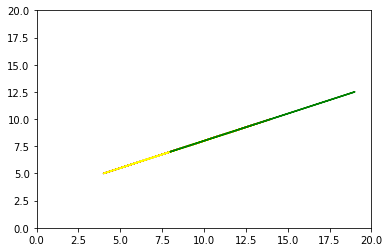

In [476]:
plt.plot(x1,y1_best,color='black') #lets plot it and check
plt.plot(x2,y2_best,color='red') 
plt.plot(x3,y3_best,color='yellow') 
plt.plot(x4,y4_best,color='green') 
plt.xlim([0,20])
plt.ylim([0,20])
plt.show() # we an see that all the lines are consistent and therefore this are the predicted y values.

In [510]:
RSS1 = sum((y1-y1_best)**2) #Residual Sum of Squares equation from diagram (https://i.stack.imgur.com/FOzPq.png)
RSS2 = sum((y2-y2_best)**2)
RSS3 = sum((y3-y3_best)**2)
RSS4 = sum((y4-y4_best)**2)

RSS_list = [RSS1, RSS2, RSS3, RSS4]
print('RSS of each data set is:', RSS_list) 

RSS of each data set is: [13.762689999999996, 13.776290909090909, 13.756191818181817, 13.742490000000005]


This result is fairly consistent across the 4 data sets and consistent with Anscombes results of 13.75.

I cannot find evidence that the "cost" function within the Machine Learning environment, which also determines how close the values are to the best fit line, is the exact same value as the RSS. However, they are very similar and in calculating the cost for the first data set, I get a result that is only 0.01 away from Anscombe's overall result (13.75) but the same to decinal places for the first dataset specifically (13.76268). 

In [509]:
cost = lambda m1,c1: np.sum([(y1[i] - m1 * x1[i] - c1)**2 for i in range(x1.size)]) #using Ian McLoughlan's formula (https://github.com/ianmcloughlin/jupyter-teaching-notebooks/raw/master/simple-linear-regression.ipynb)
print("Cost of first dataset is: %8.2f" % (cost(m1, c1)))

Cost of first dataset is:    13.76


To confirm the statement in the diagram that TSS = RSS + ESS I calculate TSS and ESS and test the equation

In [511]:
TSS1 = sum((y1-np.mean(y1))**2) #equation for Total sum of squares (https://i.stack.imgur.com/FOzPq.png)
TSS2 = sum((y2-np.mean(y2))**2) #repeat for other datasets
TSS3 = sum((y3-np.mean(y3))**2) #repeat for other datasets
TSS4 = sum((y4-np.mean(y4))**2) #repeat for other datasets

TSS_list = [TSS1, TSS2, TSS3, TSS4]
print('TSS of each data set is:', TSS_list)

TSS of each data set is: [41.27269090909091, 41.2762909090909, 41.226200000000006, 41.232490909090906]


In [512]:
ESS1 = sum((y1_best-np.mean(y1))**2) #Explained Sum of Squares
ESS2 = sum((y2_best-np.mean(y2))**2) 
ESS3 = sum((y3_best-np.mean(y3))**2) 
ESS4 = sum((y4_best-np.mean(y4))**2) 

ESS_list = [ESS1, ESS2, ESS3, ESS4]
print('ESS of each data set is:', ESS_list)

ESS of each data set is: [27.510000909090913, 27.499999999999996, 27.470008181818205, 27.49000090909091]


In [491]:
Equation_success = [RSS1 + ESS1 == TSS1, RSS2 + ESS2 == TSS2, RSS3 + ESS3 == TSS3, RSS4 + ESS4 == TSS4] #tested to see if the results were "adding up" - they are!!
Equation_success

[True, True, False, False]

Although data sets 3 and 4 are False, they give the same overall value to at least 10 decimal places. 

In [492]:
RSS3 + ESS3 #this is correct to at least 10 decimal places

41.22620000000002

In [495]:
RSS4 + ESS4 #this is correct to at least 10 decimal places

41.23249090909091

### Summary

Going back to Anscombe's original table, I have now seen the following to be true (to at least 2 decimal places): 

| **Paramater** | **Anscombe's Result** | **Reproduced Here** 
|--- | --- | --- |
|Number of observations (*n*)| 11 | Yes
| Mean of the *x*’s ($\bar{x}$) | 9.0 | Yes
| Mean of the *y*’s ($\bar{y}$) | 7.5 | Yes
| Regression coefficient(*b*<sub>1</sub>) of *y* on *x* | 0.5 | Yes
| Equation of regression line *y* | 3 + 0.5 *x* | Yes
| Sum of squares of *x* - ($\bar{x}$) | 110.0 | Yes
| Multiple *R*<sup>2</sup> | 0.667 | Yes
| Residual sum of squares of *y* | 13.75 (9 d.f.) | Yes
| Regression sum of squares | 27.50 (1 d.f.) | Yes

No conclusive confirmation could be made of the following parameter however, my work to try is in the back-up section of the notebook: 
- Estimated standard error of *b*<sub>1</sub> - 0.118


## 4. Explain why the dataset is interesting, referring to the plots and statistics above.

In summary, these four sets of data are fascinating as they produce almost identical descriptive statistics and even have portions of their values that are the very same (i.e. sets 1, 2 and 3 all have the same *x* values). Yet once plotted, they each create very different shaped curves.

Franscis Anscombe set out to prove the worth of plotting data *as well as* analyzing it at the numerical level. I think he made a very strong statement as these data sets and his message continues to be analysed and discussed at length today. As discussed in section 1, the research by Matejka and Fitzmaurice, only published in 2017, has ensured this subject will continue to be discussed for some time to come. This concept and warning continues to be more and more relevant as data set size increases and data becomes even more vital in making decisions both in business and the wider society.

## References

1. F. J. Anscombe (1973). Graphs in Statistical Analysis. The American Statistician, 27(1):17-21.
2. Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing (The Datasaurus Dozen), J.Matejka and G.Fitzmaurice 2017 https://dl.acm.org/citation.cfm?doid=3025453.3025912
3. The original Datasaurus, Alberto Cairo, 2016 http://www.thefunctionalart.com/2016/08/download-datasaurus-never-trust-summary.html
4. Supplimentary blogpost on the The Datasaurus Dozen by J.Matejka 2017 https://www.autodeskresearch.com/publications/samestats
5. http://mathworld.wolfram.com/SimulatedAnnealing.html
6. https://upload.wikimedia.org/wikipedia/commons/1/10/Travelling_salesman_problem_solved_with_simulated_annealing.gif
7. https://en.wikipedia.org/wiki/Residual_sum_of_squares
8. https://en.wikipedia.org/wiki/Explained_sum_of_squares
9. https://stats.stackexchange.com/questions/265869/confused-with-residual-sum-of-squares-and-total-sum-of-squares

## Back Up

## Estimated Standard Error Attempt

**Expected result: Estimated standard error of b1 - 0.118**

Standard Error of the *Mean* (SEM) = standard deviation of the sample mean divided by the square root of n (the sample size).

https://www.statsdirect.com/help/basic_descriptive_statistics/standard_deviation.html

In [463]:

SEM = (np.std(x1)/np.sqrt(11))
SEM

0.9534625892455924

In [464]:
SEx = s / sqrt( n )

NameError: name 'sqrt' is not defined